# API Project for Creating App
Professor: Kaveh Bakhtiyari

Student: Yasaman Badeli

This project is a Streamlit-based web application designed to predict livestock milk production based on various characteristics. The app allows users to input specific livestock data (size, temperature, and other numeric features) through an interactive sidebar and select a machine learning model (Neural Network or Linear Regression) for predictions. It also analyzes trends in milk production and prices over time, providing valuable insights into livestock management.

The app integrates dynamic sliders, dropdown menus, and toggles to facilitate data entry and uses external APIs for processing and visualization. Its intuitive interface and robust prediction capabilities make it a practical tool for farmers, researchers, and analysts in the agricultural sector.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
df = pd.read_csv("HO_DPR.csv")
df.head()

,yob1,W_HO_PTA_dpr_SB,UW_HO_PTA_dpr_SB,T_W_HO_PTA_dpr_SB,T_UW_HO_PTA_dpr_SB,HO_ptadpr_RegCow_1,W_HO_SD_dpr_SB,W_BY1_HO_SD_dpr_SB,UW_HO_SD_dpr_SB,UW_BY1_HO_SD_dpr_SB,...,nGI_SB,nGI_SC,nGI_DB,nGI_DC,yob7,UW_BY1_HO_PTA_dpr_SB,HO_ptadpr_RegCow_7,HO_numdpr_RegCow,HO_ptadpr_AllCow_3,HO_numdpr_AllCow
0,1975,0.130570,4.096247,0.130570,4.096247,4.995753,-4.865183,NaN,-0.899506,NaN,...,NaN,137,NaN,754,1975,NaN,4.995753,1629,5.672266,456398
1,1976,2.581568,3.816350,2.581568,3.816350,4.681529,-2.099962,NaN,-0.865180,NaN,...,NaN,939,NaN,1869,1976,NaN,4.681529,2109,5.464345,493963
2,1977,0.940723,3.508654,0.940723,3.508654,4.511802,-3.571079,NaN,-1.003148,NaN,...,NaN,31849,168.0,61546,1977,NaN,4.511802,2422,5.323663,533358
3,1978,-0.423900,3.406403,-0.423900,3.406403,4.415603,-4.839503,NaN,-1.009199,NaN,...,NaN,71684,493.0,159973,1978,NaN,4.415603,2611,5.163671,563020
4,1979,1.497342,3.162529,1.497342,3.162529,4.269970,-2.772629,-0.174984,-1.107441,NaN,...,134.0,100234,1058.0,268884,1979,NaN,4.269970,3145,4.957354,624359


This dataset represents a study or analysis across different years (yob1 to yob7 columns) related to genetic or reproductive traits in dairy cows.
# Variables:
Year-based (yob1, yob7): indicate the year of birth or another temporal marker.
W_HO_PTA_dpr_SB to UW_BY1_HO_SD_dpr_SB: Genetic or trait predictors.
nGI_*: Genetic indices across subcategories.
HO_ptadpr_* and HO_numdpr_*: Herd-level or aggregated data poi
# Missing Values: 
Some columns, such as W_BY1_HO_SD_dpr_SB, contain NaN values.
nts.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 132 entries, yob1 to HO_numdpr_AllCow
dtypes: float64(119), int64(13)
memory usage: 42.4 KB


In [4]:
df.shape

(41, 132)

In [5]:
df.describe()

,yob1,W_HO_PTA_dpr_SB,UW_HO_PTA_dpr_SB,T_W_HO_PTA_dpr_SB,T_UW_HO_PTA_dpr_SB,HO_ptadpr_RegCow_1,W_HO_SD_dpr_SB,W_BY1_HO_SD_dpr_SB,UW_HO_SD_dpr_SB,UW_BY1_HO_SD_dpr_SB,...,nGI_SB,nGI_SC,nGI_DB,nGI_DC,yob7,UW_BY1_HO_PTA_dpr_SB,HO_ptadpr_RegCow_7,HO_numdpr_RegCow,HO_ptadpr_AllCow_3,HO_numdpr_AllCow
count,41.000000,39.000000,38.000000,30.000000,29.000000,41.000000,39.000000,37.000000,38.000000,32.000000,...,37.000000,4.100000e+01,39.000000,41.000000,41.000000,32.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,1995.000000,0.095713,0.988849,-0.085443,1.199143,1.459502,-1.435164,-1.600759,-0.585690,-0.718006,...,6949.702703,6.651667e+05,6917.384615,565213.024390,1995.000000,0.845523,1.459502,67983.658537,1.973021,8.253310e+05
std,11.979149,1.005780,1.347723,1.037799,1.470816,1.763281,1.724356,1.459790,0.784022,0.750597,...,4669.592374,3.630509e+05,4455.770437,226764.216009,11.979149,1.162804,1.763281,66931.092705,1.981965,2.307684e+05
min,1975.000000,-1.884397,-0.467309,-1.889978,-0.500549,-0.467998,-4.865183,-3.509622,-1.455111,-1.498537,...,117.000000,1.370000e+02,168.000000,754.000000,1975.000000,-0.344864,-0.467998,1629.000000,-0.175541,9.485000e+04
25%,1985.000000,-0.658780,-0.031716,-0.782027,-0.122638,-0.152339,-2.606188,-2.748390,-1.149865,-1.219519,...,4959.000000,4.809200e+05,4410.000000,549853.000000,1985.000000,-0.112540,-0.152339,10677.000000,0.175233,7.412240e+05
50%,1995.000000,-0.119383,0.543138,-0.428652,0.909987,0.840157,-1.883916,-1.955184,-0.961221,-1.099566,...,7028.000000,7.509600e+05,6885.000000,611318.000000,1995.000000,0.440166,0.840157,23216.000000,1.312391,8.075500e+05
75%,2005.000000,0.860250,1.830102,0.336237,2.285688,2.992430,-0.100038,-0.598086,-0.053417,-0.463237,...,7726.000000,8.356770e+05,7572.000000,676221.000000,2005.000000,1.614924,2.992430,147453.000000,3.704457,8.750170e+05
max,2015.000000,2.581568,4.096247,2.581568,4.096247,4.995753,1.785747,1.361660,1.190355,0.993042,...,19919.000000,1.376951e+06,19894.000000,917610.000000,2015.000000,3.229577,4.995753,177875.000000,5.672266,1.422601e+06


In [6]:
print(df.isnull().sum())

yob1                     0
W_HO_PTA_dpr_SB          2
UW_HO_PTA_dpr_SB         3
T_W_HO_PTA_dpr_SB       11
T_UW_HO_PTA_dpr_SB      12
                        ..
UW_BY1_HO_PTA_dpr_SB     9
HO_ptadpr_RegCow_7       0
HO_numdpr_RegCow         0
HO_ptadpr_AllCow_3       0
HO_numdpr_AllCow         0
Length: 132, dtype: int64


# Histogram

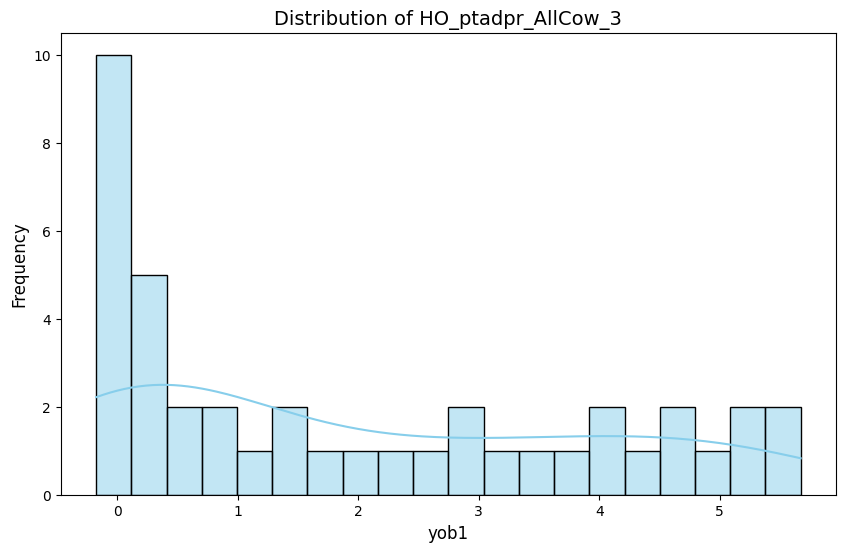

In [85]:
plt.figure(figsize=(10, 6))

# Plotting the histogram for the 'yob1' column
sns.histplot(df['HO_ptadpr_AllCow_3'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of HO_ptadpr_AllCow_3', fontsize=14)
plt.xlabel('yob1The ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Scatter Plot

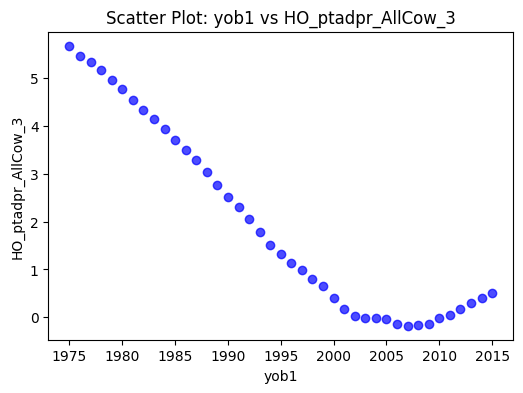

In [86]:
plt.figure(figsize=(6, 4))
plt.scatter(df['yob1'], df['HO_ptadpr_AllCow_3'], alpha=0.7, color="blue")
plt.title("Scatter Plot: yob1 vs HO_ptadpr_AllCow_3", fontsize=12)
plt.xlabel("yob1")
plt.ylabel("HO_ptadpr_AllCow_3")
plt.show()

# Train Test Split

In [9]:
X = df.drop(columns=['yob1'])  
y = df['yob1']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (32, 131)
Test set size: (9, 131)


# Pipe line

In [10]:
df.columns

Index(['yob1', 'W_HO_PTA_dpr_SB', 'UW_HO_PTA_dpr_SB', 'T_W_HO_PTA_dpr_SB',
       'T_UW_HO_PTA_dpr_SB', 'HO_ptadpr_RegCow_1', 'W_HO_SD_dpr_SB',
       'W_BY1_HO_SD_dpr_SB', 'UW_HO_SD_dpr_SB', 'UW_BY1_HO_SD_dpr_SB',
       ...
       'nGI_SB', 'nGI_SC', 'nGI_DB', 'nGI_DC', 'yob7', 'UW_BY1_HO_PTA_dpr_SB',
       'HO_ptadpr_RegCow_7', 'HO_numdpr_RegCow', 'HO_ptadpr_AllCow_3',
       'HO_numdpr_AllCow'],
      dtype='object', length=132)

In [82]:
features_to_scale = ['HO_ptadpr_AllCow_3', 'UW_BY1_HO_PTA_dpr_SB', 
                     'HO_ptadpr_RegCow_7', 'HO_numdpr_RegCow', 
                     'HO_ptadpr_RegCow_1', 'HO_numdpr_AllCow']

transformer = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), features_to_scale)],
    remainder="passthrough"  # Keeps other columns unchanged
)

parameters = {
    "random_state": 42,
    "hidden_layer_sizes": (80, 60),
    "max_iter": 1000,
    "verbose": False,
    "n_iter_no_change": 100,
    "early_stopping": True
}

# Build the pipeline
pipe = Pipeline(steps=[
    ("transformer", transformer),  # Scaling step
    ("model", MLPClassifier(**parameters))  # Model step
])
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['UW_HO_PTA_dpr_SB',
                                                   'UW_BY1_HO_PTA_dpr_SB',
                                                   'HO_ptadpr_RegCow_7',
                                                   'HO_numdpr_RegCow',
                                                   'HO_ptadpr_RegCow_1',
                                                   'HO_numdpr_AllCow'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(80, 60),
                               max_iter=1000, n_iter_no_change=100,
                               random_state=42))])

# Training

In [64]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', RandomForestClassifier(random_state=42))  
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

# Machine Learning / LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression

model_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#Evalute Model

for model, name in zip([pipe, model_lr], ['RandomForest', 'LinearRegression']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - MSE: {mse}")

RandomForest - MSE: 137.33333333333334
LinearRegression - MSE: 35.44794749522916


In [28]:
features_to_scale = ['HO_ptadpr_RegCow_1', 'UW_BY1_HO_PTA_dpr_SB',
       'HO_ptadpr_RegCow_7', 'HO_numdpr_RegCow', 'HO_ptadpr_AllCow_3',
       'HO_numdpr_AllCow']

transformer = ColumnTransformer(transformers=[("scaler",
                                               StandardScaler(),
                                               features_to_scale)],
                                               force_int_remainder_cols=False,
                                               remainder="passthrough")


model = MLPClassifier(warm_start=True, max_iter=1000)


parameters = {"random_state": 42,
             "hidden_layer_sizes": (80, 60, ),
             "max_iter": 1000,
             "verbose": False,
             "n_iter_no_change": 100,
             "early_stopping": True}

pipe_ml= Pipeline(steps=[("transformer", transformer),
                       ("model", MLPClassifier(**parameters))])

pipe_ml

Pipeline(steps=[('transformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['HO_ptadpr_RegCow_1',
                                                   'UW_BY1_HO_PTA_dpr_SB',
                                                   'HO_ptadpr_RegCow_7',
                                                   'HO_numdpr_RegCow',
                                                   'HO_ptadpr_AllCow_3',
                                                   'HO_numdpr_AllCow'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(80, 60),
                               max_iter=1000, n_iter_no_change=100,
                               random_state=42))])

# Scatter Plot/ ML

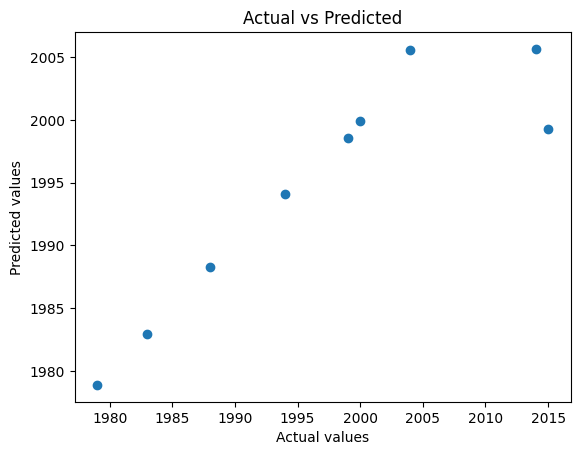

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()

# Evaluations

In [16]:
y_pred = pipe.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


In [19]:
# For multiclass classification, use one of these averaging methods
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1 = f1_score(y_test, y_pred, average='macro')                

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.00
Recall: 0.00
F1-Score: 0.00


C:\Users\yasam\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yasam\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
print(f" Score on training: {pipe.score(X_train, y_train)*100:.2f}%")

 Score on training: 100.00%


In [21]:
# Accuracy
print(f" Test Acuracy: {pipe.score(X_test, y_test)*100:.2f}%")

 Test Acuracy: 0.00%


In [33]:
import pickle
pickle.dump(pipe, open("HOPDR-pipe-nn.pkl", "wb"))
pickle.dump(pipe_ml, open("HOPDR-pipe-ml.pkl", "wb"))

# Conclusion

This project demonstrates the integration of machine learning models into a 
user-friendly web application for predicting livestock milk production. By leveraging 
Streamlit for interactivity and visualization, the app provides an accessible platform 
for analyzing livestock data and deriving meaningful insights. The ability to customize 
inputs and select models ensures flexibility, while the predictions and trends analysis 
offer valuable guidance for decision-making in the agricultural industry. This tool highlights 
the potential of combining data science and technology to address real-world challenges effectively.